In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error,mean_absolute_error, mean_absolute_percentage_error
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings('ignore')
import itertools

In [4]:
df=pd.read_csv('product b.csv', parse_dates=['Month-Year'], index_col='Month-Year')

In [5]:
df.head(15)

,Product Name,Product Category,Month,Year,Sales,Market Size,Marketing Expense,Month No.
Month-Year,,,,,,,,
2019-01-01,Product B,Pain / Analgesic,January,2019,494357,2738080,177316,1
2019-02-01,Product B,Pain / Analgesic,February,2019,837207,4637013,300290,2
2019-03-01,Product B,Pain / Analgesic,March,2019,1278271,7079920,458491,3
2019-04-01,Product B,Pain / Analgesic,April,2019,675985,3744057,242463,4
2019-05-01,Product B,Pain / Analgesic,May,2019,757687,4196578,271768,5
2019-06-01,Product B,Pain / Analgesic,June,2019,1154891,6396559,414237,6
2019-07-01,Product B,Pain / Analgesic,July,2019,459535,2545212,164826,7
2019-08-01,Product B,Pain / Analgesic,August,2019,1136386,6294066,407600,8
2019-09-01,Product B,Pain / Analgesic,September,2019,984890,5454980,353261,9


In [6]:
sales_b= df.drop(['Product Name','Product Category','Month','Year','Month No.'],axis=1)

In [7]:
sales_b.shape

(60, 3)

In [8]:
sales_b.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2019-01-01 to 2023-12-01
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Sales              60 non-null     int64
 1   Market Size        60 non-null     int64
 2   Marketing Expense  60 non-null     int64
dtypes: int64(3)
memory usage: 1.9 KB


In [9]:
print('Total Sales:', sales_b['Sales'].sum())
print('Total Market Size:',sales_b['Market Size'].sum())
print('Total Marketing Expense:', sales_b['Marketing Expense'].sum())

Total Sales: 70016882
Total Market Size: 360874201
Total Marketing Expense: 19873176


Text(0.5, 1.0, 'Product B')

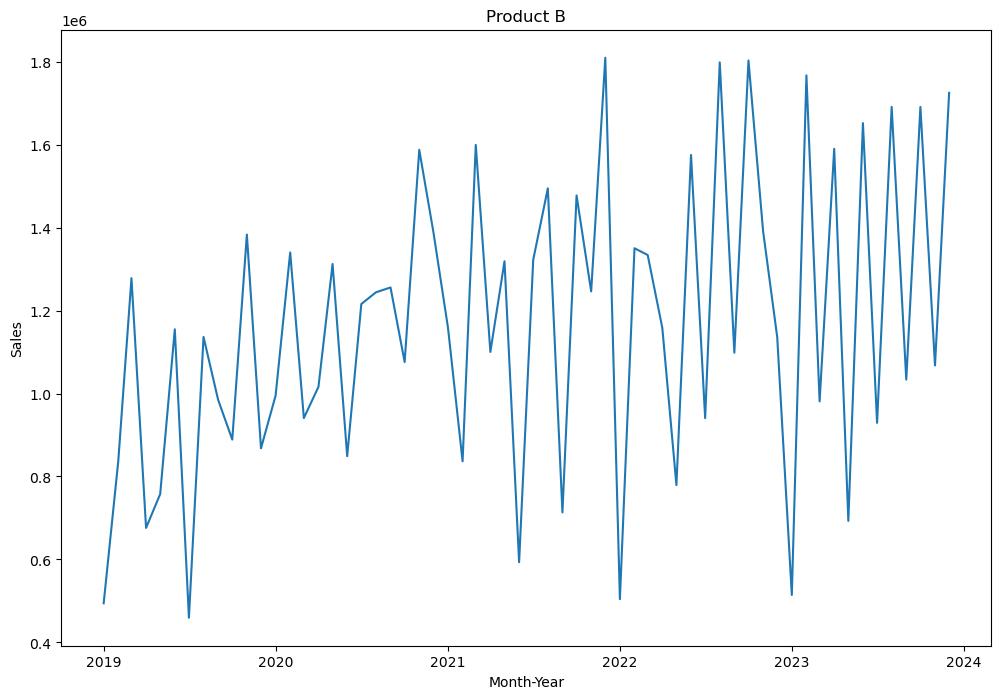

In [10]:
plt.figure(figsize=(12,8))
sns.lineplot(sales_b['Sales'])
plt.title('Product B')

In [11]:
from statsmodels.tsa.stattools import adfuller

In [12]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [13]:
adf_test(sales_b['Sales'])

ADF Statistics: -2.263078907366476
p- value: 0.18415230168794178
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [14]:
sales_b_diff= sales_b['Sales'].diff().dropna()

Text(0.5, 1.0, 'Product B - First Difference')

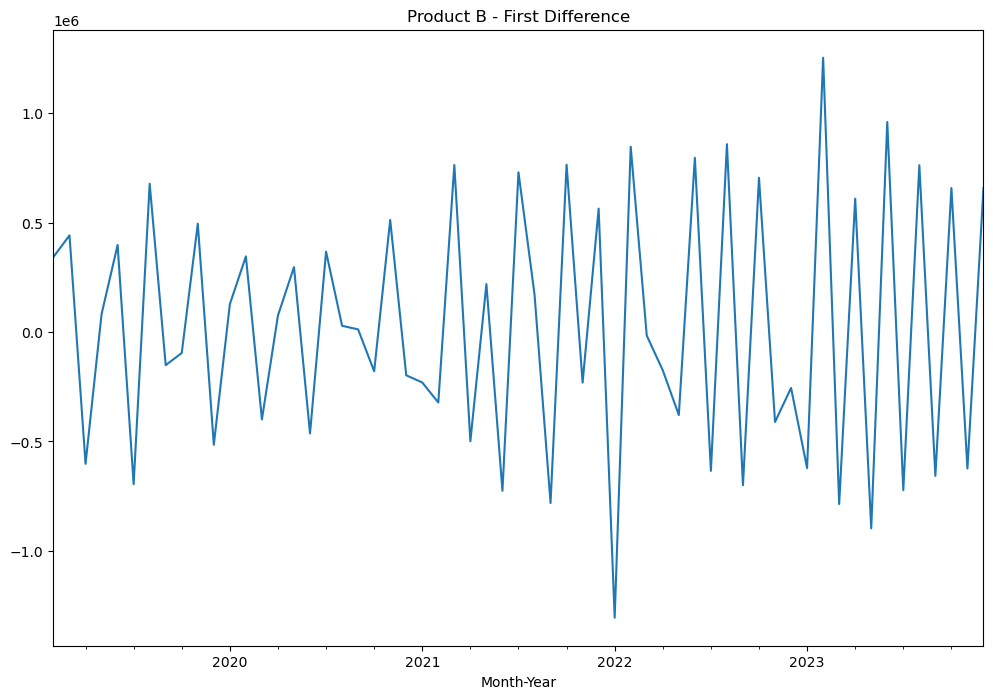

In [15]:
sales_b_diff.plot(figsize=(12,8))
plt.title('Product B - First Difference')

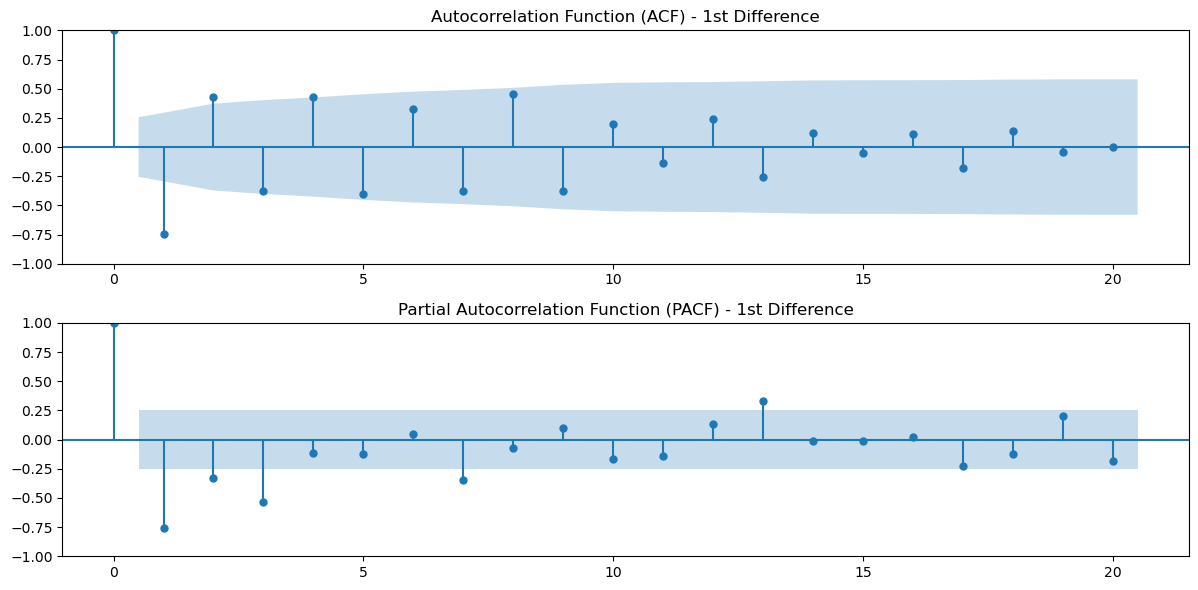

In [16]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(sales_b_diff, lags=20, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) - 1st Difference')

plt.subplot(212)
plot_pacf(sales_b_diff, lags=20, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) - 1st Difference')

plt.tight_layout()
plt.show()

In [17]:
adf_test(sales_b_diff)

ADF Statistics: -10.617041136124557
p- value: 5.639859315327351e-19
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [18]:
train= sales_b[:48]
test=sales_b[48:]

In [19]:
print(len(train),len(test))

48 12


In [20]:
#Finding the best value for ARIMA

#import itertools
#p=d=q=range(0,5)
#pdq = list(itertools.product(p,d,q))

#for param in pdq:
#    try:
#        model_arima = ARIMA(train,order=param)
#        model_arima_fit = model_arima.fit()
#       print(param,model_arima_fit.aic)
#    except:
#        continue
    
# The Akaike information criterion (AIC) is an estimator of in-sample prediction error and thereby relative quality of
# statistical models for a given set of data

# It's like the mean squared error in Regression - The smaller the number, the better

In [21]:
#therefore, the combination p=(0,1,2,3,4,5) d=1 q=(0,1,2,3) must be tested with accuracy metrics and aic

In [22]:
#param = [(0,1,0),(0,1,1),(0,1,2),(0,1,3),(1,1,0),(1,1,1),(1,1,2),(1,1,3),(2,1,0), (2,1,1), (2,1,2),(2,1,3),(3,1,0),(3,1,1),(3,1,2),(3,1,3),(4,1,0),(4,1,1),(4,1,2),(4,1,3),(5,1,0),(5,1,1),(5,1,2),(5,1,3)]

#for p in param:  # Changed 'x' to 'p'
#    model = ARIMA(train, order=p).fit()
#    pred = model.forecast(steps=len(test))
#    mae = mean_absolute_error(test, pred)
#    mape = np.mean(np.abs((test - pred) / test)) * 100
#    mse=mean_squared_error(test, pred)
#    rmse = np.sqrt(mean_squared_error(test, pred))
#    print(p)
#    print(f'MAE: {mae}')
#    print(f'MSE: {mse}')
#    print(f'RMSE: {rmse}')
#    print('A.I.C:', model.aic)

In [23]:
order=[]
for p in range(5):
    # Loop over MA order
    for q in range(4):
        # Fit model        
#       model= ARIMA(sales_b, order=(p,1,q))
        model_t = ARIMA(train['Sales'], order=(p,1,q), exog=train[['Market Size','Marketing Expense']])
        model_test=model_t.fit() 
        pred=model_test.predict(start=len(train), end=(len(sales_b)-1), exog=test[['Market Size','Marketing Expense']])
        mae = mean_absolute_error(test['Sales'], pred)
        mape = np.mean(np.abs((test['Sales'] - pred) / test)) * 100
        mse=mean_squared_error(test['Sales'], pred)
        rmse = np.sqrt(mean_squared_error(test['Sales'], pred))
        # Add order and scores to list        
        order.append((p, q, model_test.aic, model_test.bic,mae, mse, rmse))
#Make DataFrame of model order and AIC/BIC scores
order_df = pd.DataFrame(order, columns=['p','q', 'aic', 'bic', 'mae','mse', 'rmse'])

In [24]:
# Sort by AIC
print(order_df.sort_values('aic'))

    p  q          aic          bic            mae           mse           rmse
7   1  3  1179.971484  1192.922517  408178.969466  1.691215e+11  411243.894583
18  4  2  1180.814250  1197.465578  438341.988422  1.954186e+11  442061.771333
14  3  2  1181.234307  1196.035488  410276.564817  1.713619e+11  413958.801069
11  2  3  1181.961246  1196.762426  300385.027548  9.193778e+10  303212.435444
19  4  3  1182.942436  1201.443912  440105.321158  1.948059e+11  441368.166946
3   0  3  1183.623787  1194.724673  416676.975648  1.771297e+11  420867.811893
10  2  2  1183.954270  1196.905303  382881.179833  1.489656e+11  385960.571028
15  3  3  1184.158292  1200.809620  352328.597285  1.257588e+11  354624.853163
12  3  0  1185.270621  1196.371507  365220.571604  1.365936e+11  369585.735745
6   1  2  1185.515862  1196.616748  311552.293632  9.886611e+10  314429.815734
4   1  0  1185.765386  1193.165977  375562.957088  1.439467e+11  379403.051764
5   1  1  1185.854261  1195.104999  364110.506860  1

In [25]:
m_arima= ARIMA(train['Sales'], order=(1,1,3), exog=train[['Market Size','Marketing Expense']])
model_arima=m_arima.fit()
print(model_arima.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   48
Model:                 ARIMA(1, 1, 3)   Log Likelihood                -582.986
Date:                Thu, 09 May 2024   AIC                           1179.971
Time:                        15:39:54   BIC                           1192.923
Sample:                    01-01-2019   HQIC                          1184.845
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Market Size           0.2825      0.015     18.420      0.000       0.252       0.313
Marketing Expense    -1.6425      0.358     -4.586      0.000      -2.344      -0.941
ar.L1                -0.

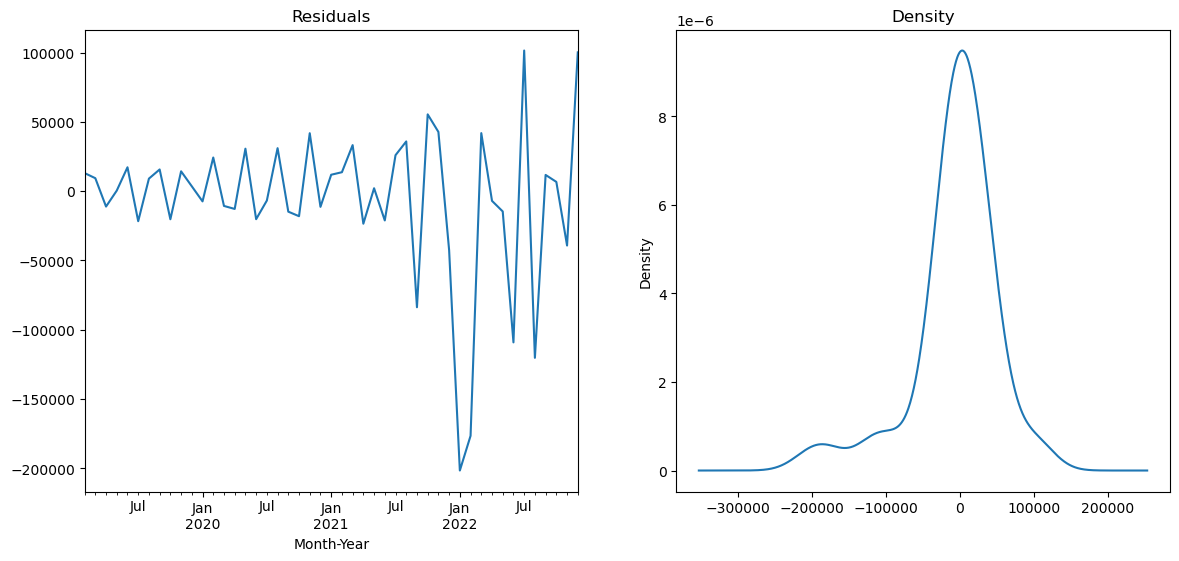

In [26]:
residuals= model_arima.resid[1:]
fig,ax=plt.subplots(1,2, figsize=(14, 6))
residuals.plot(title='Residuals',ax=ax[0])
residuals.plot(title='Density',kind='kde',ax=ax[1])
plt.show()

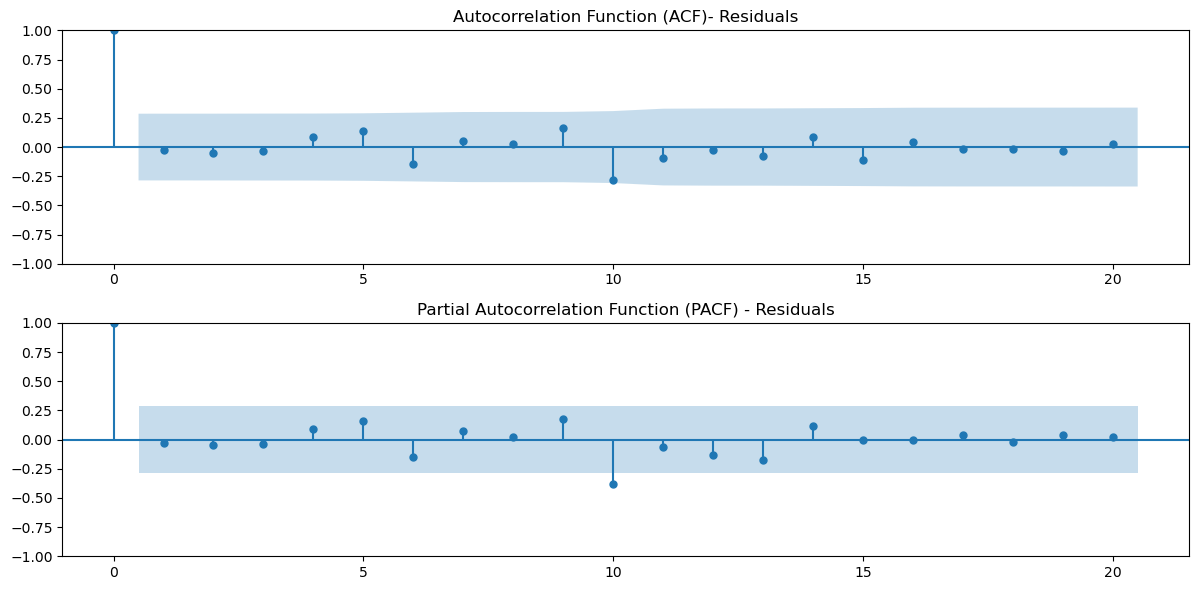

In [27]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(residuals, lags=20, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)- Residuals')

plt.subplot(212)
plot_pacf(residuals, lags=20, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) - Residuals')

plt.tight_layout()
plt.show()

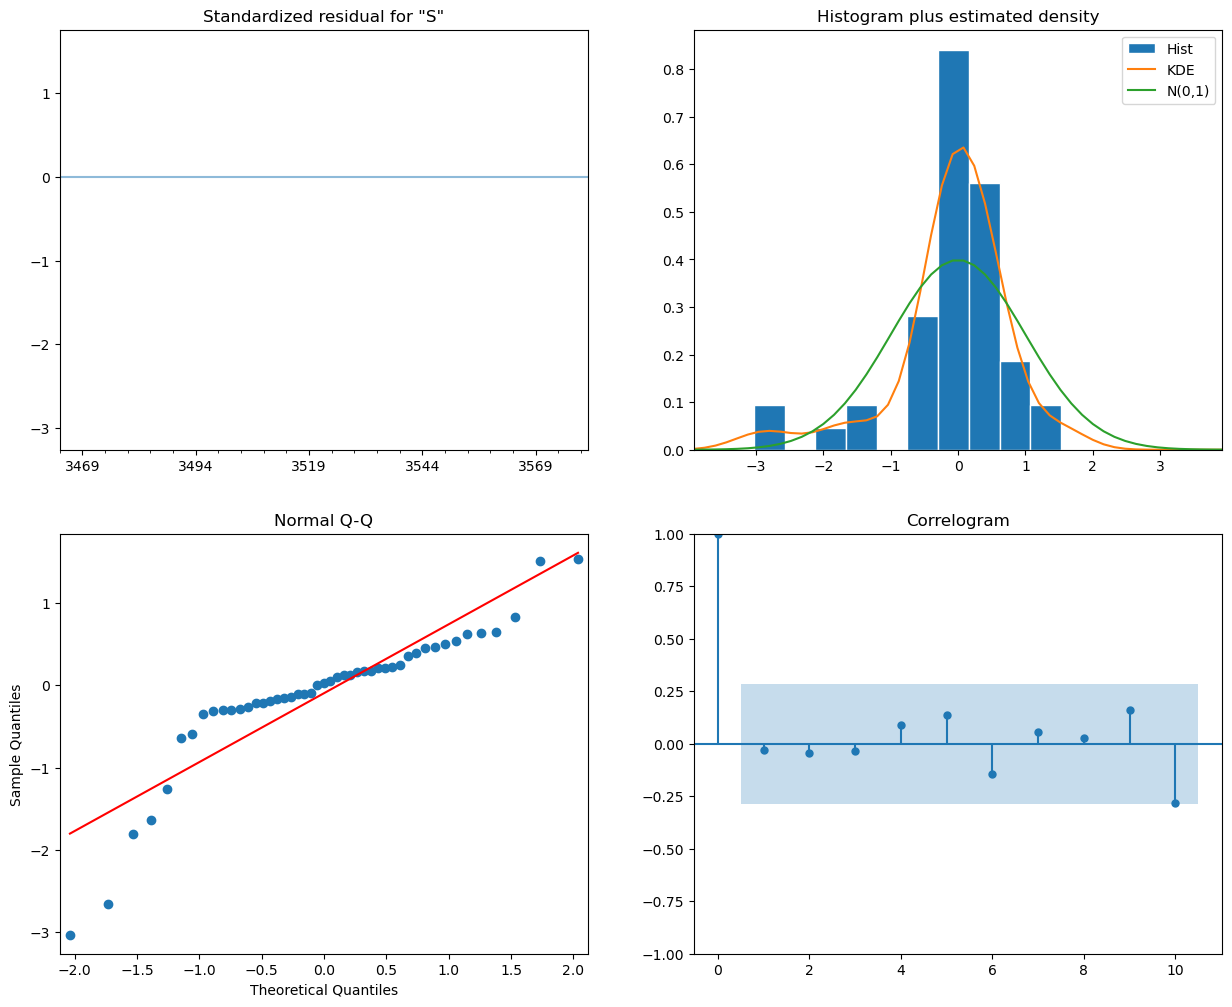

In [28]:
# Create the 4 diagostics plots
model_arima.plot_diagnostics(figsize=(15, 12))
plt.show()

In [29]:
#pred_in_sample = model_arima.get_prediction(start=len(train), end=(len(sales_b)-1))
#sales_b['Forecast_ARIMA_p']=[None]*len(train) + list(pred)

In [30]:
#plt.figure(figsize=(12, 8))
#sns.lineplot(sales_b[['Sales','Forecast_ARIMA_p']])
#plt.title('Product B')
#plt.show()

In [31]:
pred=model_arima.predict(start=len(train), end=(len(sales_b)-1), exog=test[['Market Size','Marketing Expense']], dynamic = True)
sales_b['Forecast_ARIMA']=[None]*len(train) + list(pred)
#sales_b.plot()

In [32]:
#pred=model_arima.forecast(steps= len(test))
#sales_b['Forecast_ARIMA']=[None]*len(train) + list(pred)
#sales_b.plot()

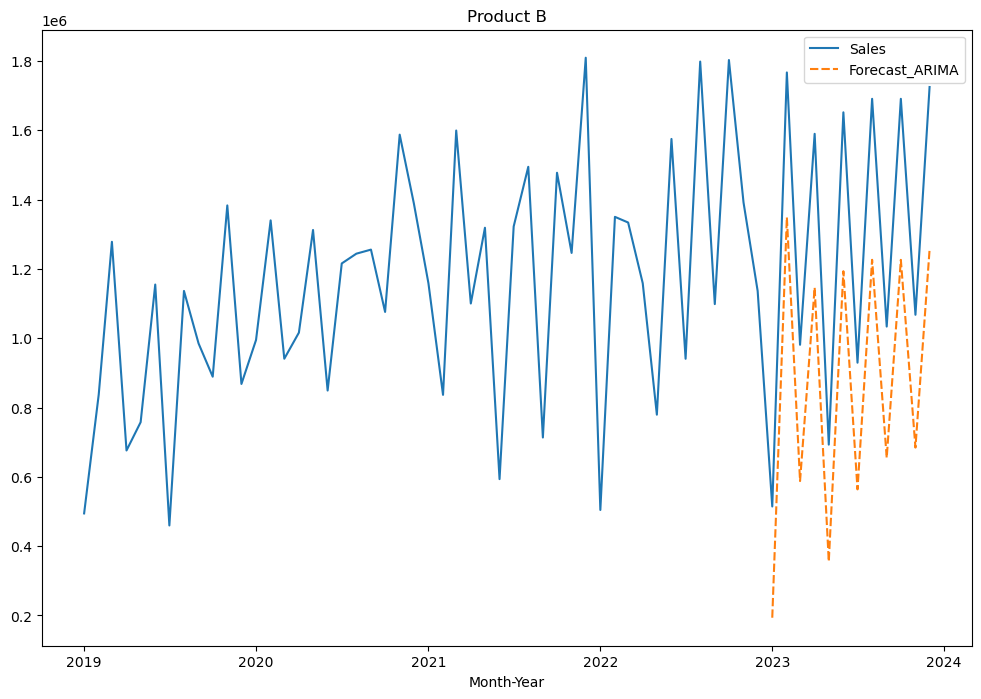

In [33]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_b[['Sales','Forecast_ARIMA']])
plt.title('Product B')
plt.show()

In [34]:
mae_arima= mean_absolute_error(test['Sales'],pred)
mse_arima=mean_squared_error(test['Sales'], pred)
mape_arima= mean_absolute_percentage_error(test['Sales'],pred)
rmse_arima= np.sqrt(mean_squared_error(test['Sales'],pred))

print(f'MAE - ARIMA: {mae_arima}')
print(f'MAPE - ARIMA: {mape_arima}')
print(f'MSE - ARIMA: {mse_arima}')
print(f'RMSE - ARIMA: {rmse_arima}')

MAE - ARIMA: 408178.9694659892
MAPE - ARIMA: 0.3538019454499974
MSE - ARIMA: 169121540831.614
RMSE - ARIMA: 411243.89458278165


# SARIMA

In [35]:
import statsmodels.api as sm

In [36]:
# Plot
#fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
#axes[0].plot(sales_b['Sales'], label='Original Series')
#axes[0].plot(sales_b['Sales'].diff(1), label='Usual Differencing')
#axes[0].set_title('Usual Differencing')
#axes[0].legend(loc='upper left', fontsize=10)


# Seasinal Dei
#axes[1].plot(sales_b['Sales'], label='Original Series')
#axes[1].plot(sales_b['Sales'].diff(12), label='Seasonal Differencing', color='green')
#axes[1].set_title('Seasonal Differencing')
#plt.legend(loc='upper left', fontsize=10)
#plt.suptitle('Product B', fontsize=16)
#plt.show()

In [37]:
# Plot ACF and PACF
#plt.figure(figsize=(12, 6))
#plt.subplot(211)
#plot_acf(sales_b['Sales'].diff(12).dropna(), lags=22, ax=plt.gca())
#plt.title('Autocorrelation Function (ACF) - Seasonal Difference')

#plt.subplot(212)
#plot_pacf(sales_b['Sales'].diff(12).dropna(), lags=22, ax=plt.gca())
#plt.title('Partial Autocorrelation Function (PACF) - Seasonal Difference')

#plt.tight_layout()
#plt.show()

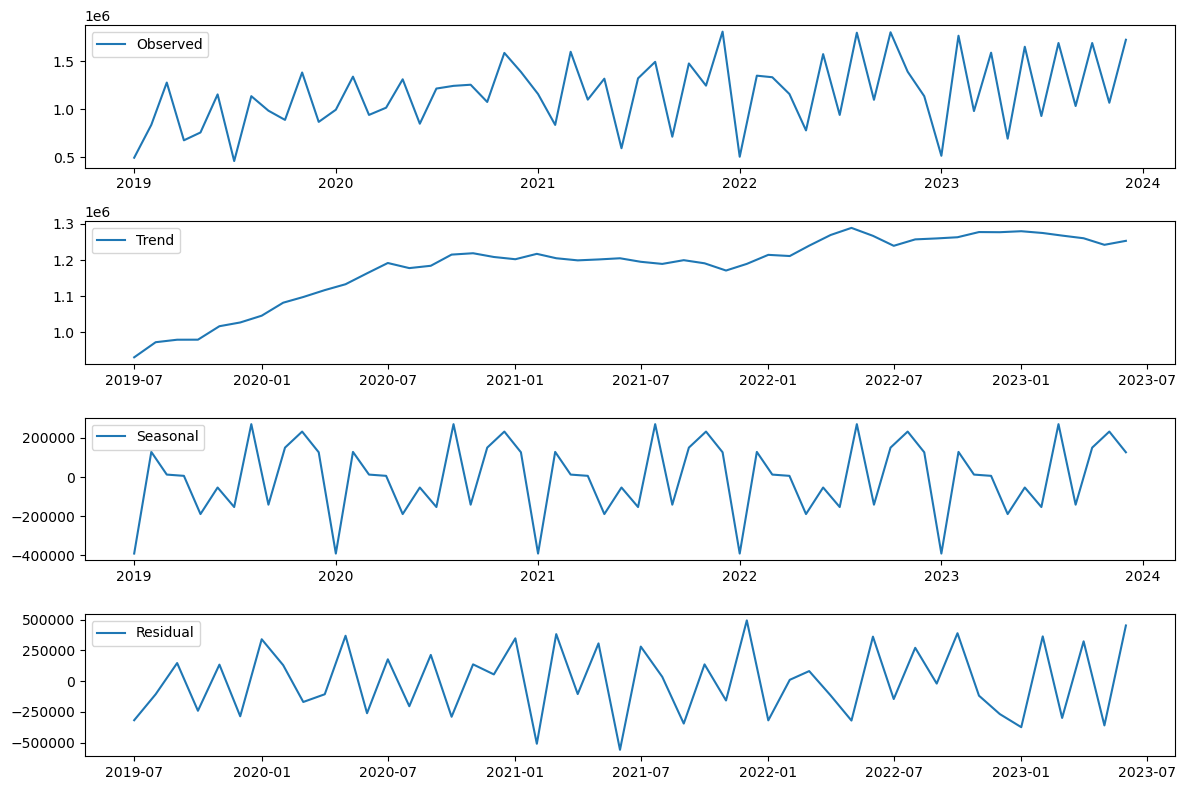

In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
decomposition = seasonal_decompose(sales_b['Sales'], model='additive', period=12)

# Plot the decomposition
#fig = decomposition.plot(figsize=(12,8))
#plt.show()
# Create a new figure with the specified size
plt.figure(figsize=(12, 8))

# Plot each component separately
plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend()

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

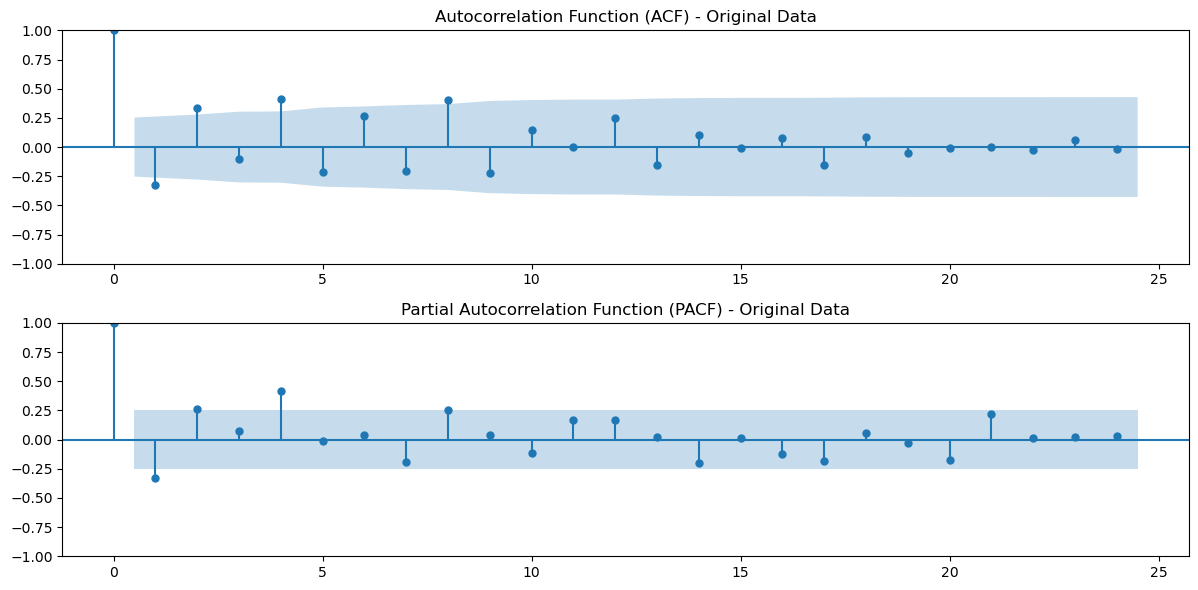

In [39]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(sales_b['Sales'], lags=24, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) - Original Data')

plt.subplot(212)
plot_pacf(sales_b['Sales'], lags=24, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) - Original Data')

plt.tight_layout()
plt.show()

In [42]:
order_SARIMAX=[]
# Loop over P order
for P in range(4):
    # Loop over Q order
    for Q in range(4):
        # Fit model
        model_s = sm.tsa.statespace.SARIMAX(train['Sales'], order=(1, 1, 3), seasonal_order=(P, 0, Q, 12),exog=train[['Market Size','Marketing Expense']])
        model_test_s = model_s.fit() 
        pred = model_test_s.predict(start=48, end=59, dynamic=True, exog=test[['Market Size','Marketing Expense']])
        mae = mean_absolute_error(test['Sales'], pred)
        mse = mean_squared_error(test['Sales'], pred)
        # Add order and scores to list        
        order_SARIMAX.append((P, Q, model_test_s.aic, model_test_s.bic, mae, mse))

# Make DataFrame of model order and scores
order_SARIMAX_df = pd.DataFrame(order_SARIMAX, columns=['P', 'Q', 'aic', 'bic', 'mae', 'mse'])


In [43]:
# Sort by AIC
print(order_SARIMAX_df.sort_values('aic'))

    P  Q          aic          bic            mae           mse
0   0  0  1179.971484  1192.922517  408178.969466  1.691215e+11
1   0  1  1181.985285  1196.786466  398489.066438  1.612932e+11
4   1  0  1182.001412  1196.802592  409553.095807  1.703264e+11
2   0  2  1183.682248  1200.333577  376876.533292  1.441945e+11
5   1  1  1183.892555  1200.543884  395850.787630  1.590121e+11
8   2  0  1183.989933  1200.641262  397737.957528  1.608456e+11
3   0  3  1185.564783  1204.066259  389121.213527  1.537415e+11
9   2  1  1185.601627  1204.103103  391299.915781  1.554145e+11
6   1  2  1185.622964  1204.124440  395050.884022  1.584791e+11
12  3  0  1185.779123  1204.280599  391469.155675  1.559005e+11
7   1  3  1187.559244  1207.910867  394825.042934  1.582810e+11
10  2  2  1187.600108  1207.951732  396142.345437  1.592899e+11
13  3  1  1187.710144  1208.061767  389983.514975  1.545768e+11
14  3  2  1189.572026  1211.773797  384487.706132  1.501158e+11
11  2  3  1189.682893  1211.884664  3909

In [44]:
sarima=sm.tsa.statespace.SARIMAX(train['Sales'],order=(1, 1, 3),seasonal_order=(0,0,0,12),exog=train[['Market Size','Marketing Expense']])
sarima_model=sarima.fit()
print(sarima_model.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   48
Model:               SARIMAX(1, 1, 3)   Log Likelihood                -582.986
Date:                Thu, 09 May 2024   AIC                           1179.971
Time:                        15:42:49   BIC                           1192.923
Sample:                    01-01-2019   HQIC                          1184.845
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Market Size           0.2825      0.015     18.420      0.000       0.252       0.313
Marketing Expense    -1.6425      0.358     -4.586      0.000      -2.344      -0.941
ar.L1                -0.

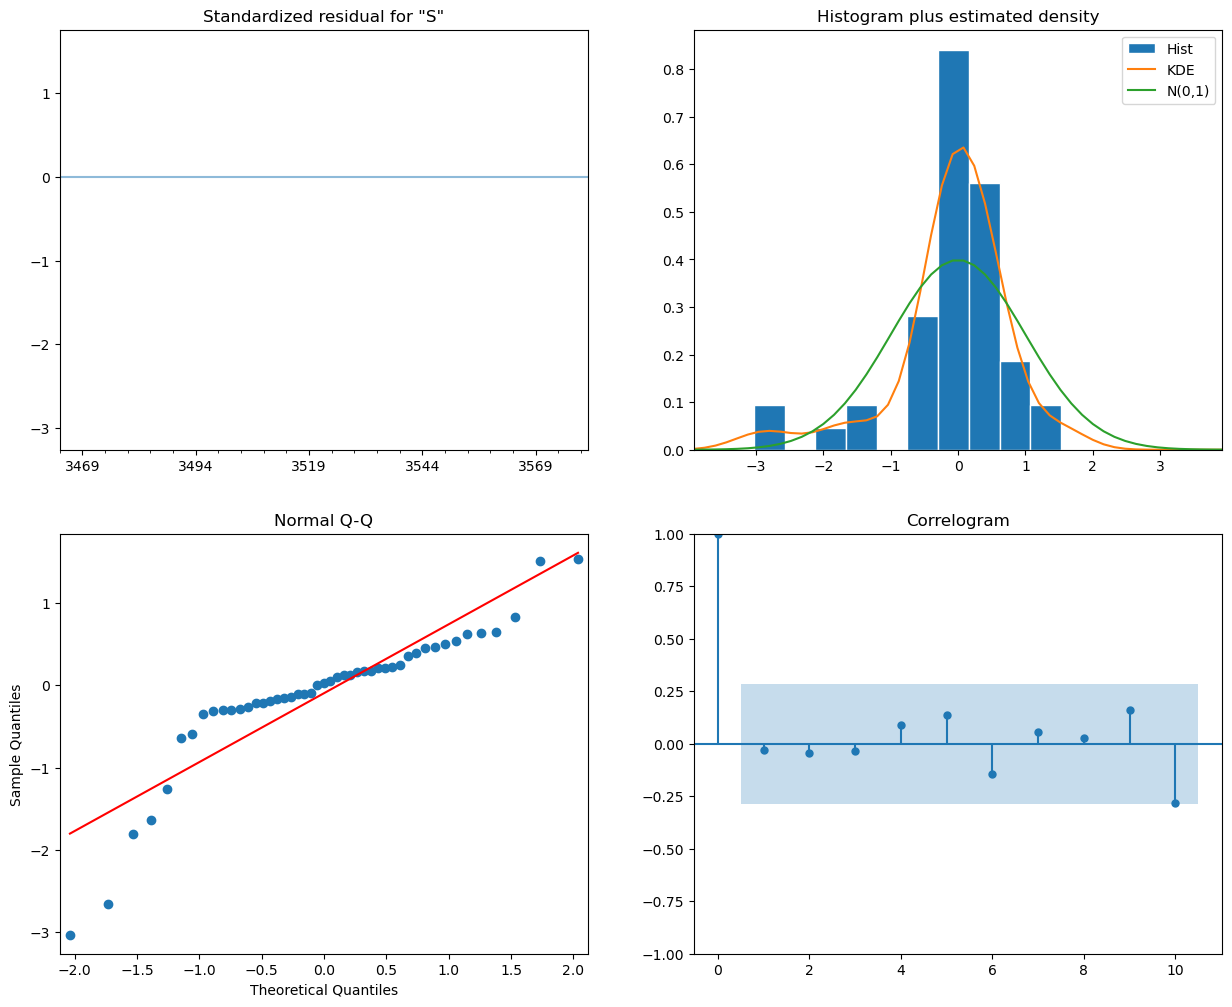

In [45]:
sarima_model.plot_diagnostics(figsize=(15, 12))
plt.show()

In [46]:
forecast_test_sarima=sarima_model.predict(start=48, end=59, dynamic=True, exog=test[['Market Size','Marketing Expense']])

In [47]:
sales_b['Forecast_SARIMA']=[None]*len(train)+ list(forecast_test_sarima)
#sales_b[['Sales','Forecast_SARIMA']].plot(figsize=(12,8))

Text(0.5, 1.0, 'Product B')

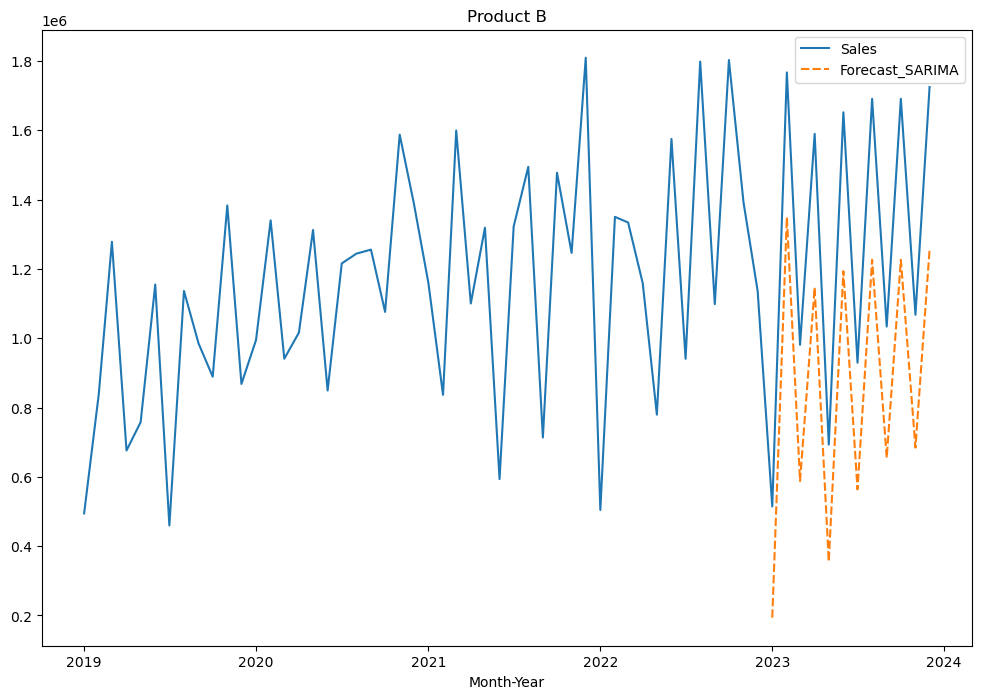

In [48]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_b[['Sales','Forecast_SARIMA']])
plt.title('Product B')

In [49]:
mae_sarima= mean_absolute_error(test['Sales'],forecast_test_sarima)
mape_sarima= mean_absolute_percentage_error(test['Sales'],forecast_test_sarima)
mse_sarima=mean_squared_error(test['Sales'], forecast_test_sarima)
rmse_sarima= np.sqrt(mean_squared_error(test['Sales'],forecast_test_sarima))

print(f'MAE - SARIMA: {round(mae_sarima,3)}')
print(f'MAPE - SARIMA: {round(mape_sarima,3)}')
print(f'MSE - SARIMA: {round(mse_sarima,3)}')
print(f'RMSE - SARIMA: {round(rmse_sarima,3)}')

MAE - SARIMA: 408178.969
MAPE - SARIMA: 0.354
MSE - SARIMA: 169121540831.614
RMSE - SARIMA: 411243.895


# AUTO-ARIMA

In [51]:
import pmdarima as pm

In [52]:
auto_arima= pm.auto_arima(train['Sales'], start_p=0, d=1, start_q=0, max_p=5,max_q=3,
                          start_P=0, D=0, start_Q=0, max_P=4 ,max_Q=4 ,  
                          stepwise=False, trace=True,
                          seasonal=True,m=12, exogenous=train[['Market Size','Marketing Expense']])
auto_arima

 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1374.393, Time=0.03 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=1376.384, Time=0.05 sec
 ARIMA(0,1,0)(0,0,2)[12] intercept   : AIC=1377.119, Time=0.21 sec
 ARIMA(0,1,0)(0,0,3)[12] intercept   : AIC=1378.474, Time=0.38 sec
 ARIMA(0,1,0)(0,0,4)[12] intercept   : AIC=1380.446, Time=1.74 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=1376.387, Time=0.05 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1378.263, Time=0.12 sec
 ARIMA(0,1,0)(1,0,2)[12] intercept   : AIC=1378.671, Time=0.29 sec
 ARIMA(0,1,0)(1,0,3)[12] intercept   : AIC=1380.457, Time=0.78 sec
 ARIMA(0,1,0)(1,0,4)[12] intercept   : AIC=1382.435, Time=4.52 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=1377.144, Time=0.13 sec
 ARIMA(0,1,0)(2,0,1)[12] intercept   : AIC=1378.530, Time=0.27 sec
 ARIMA(0,1,0)(2,0,2)[12] intercept   : AIC=1380.459, Time=0.55 sec
 ARIMA(0,1,0)(2,0,3)[12] intercept   : AIC=1382.426, Time=1.83 sec
 ARIMA(0,1,0)(3,0,0)[12] intercept   : AIC=1378.413, Time=0.51

ARIMA(order=(3, 1, 1), scoring_args={}, seasonal_order=(0, 0, 1, 12),
      suppress_warnings=True)

In [53]:
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   48
Model:             SARIMAX(3, 1, 1)x(0, 0, 1, 12)   Log Likelihood                -660.560
Date:                            Thu, 09 May 2024   AIC                           1335.120
Time:                                    15:44:49   BIC                           1348.071
Sample:                                01-01-2019   HQIC                          1339.994
                                     - 12-01-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   4.218e+04   2.76e+04      1.529      0.126   -1.19e+04    9.63e+04
ar.L1         -0.7728      0.212     -3.647      0.000      -1.188      -0.358
ar.L2         -0.4947      0.256     -1.934      0.053      -0.996       0.007
ar.L3         -0.3294      0.161     -2.051      0.040      -0.644      -0.015
ma.L1         -0.6157      0.175     -3.516      0.000      -0.959      -0.272
ma.S.L12       0.3138      0.234      1.340      0.180      -0.145       0.773
sigma2       8.38e+10      0.007   1.17e+13      0.000    8.38e+10    8.38e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.70   Jarque-Bera (JB):                 0.90
Prob(Q):                              0.40   Prob(JB):                         0.64
Heteroskedasticity (H):               1.03   Skew:                            -0.17
Prob(H) (two-sided):                  0.96   Kurtosis:                         2.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.21e+29. Standard errors may be unstable.
"""

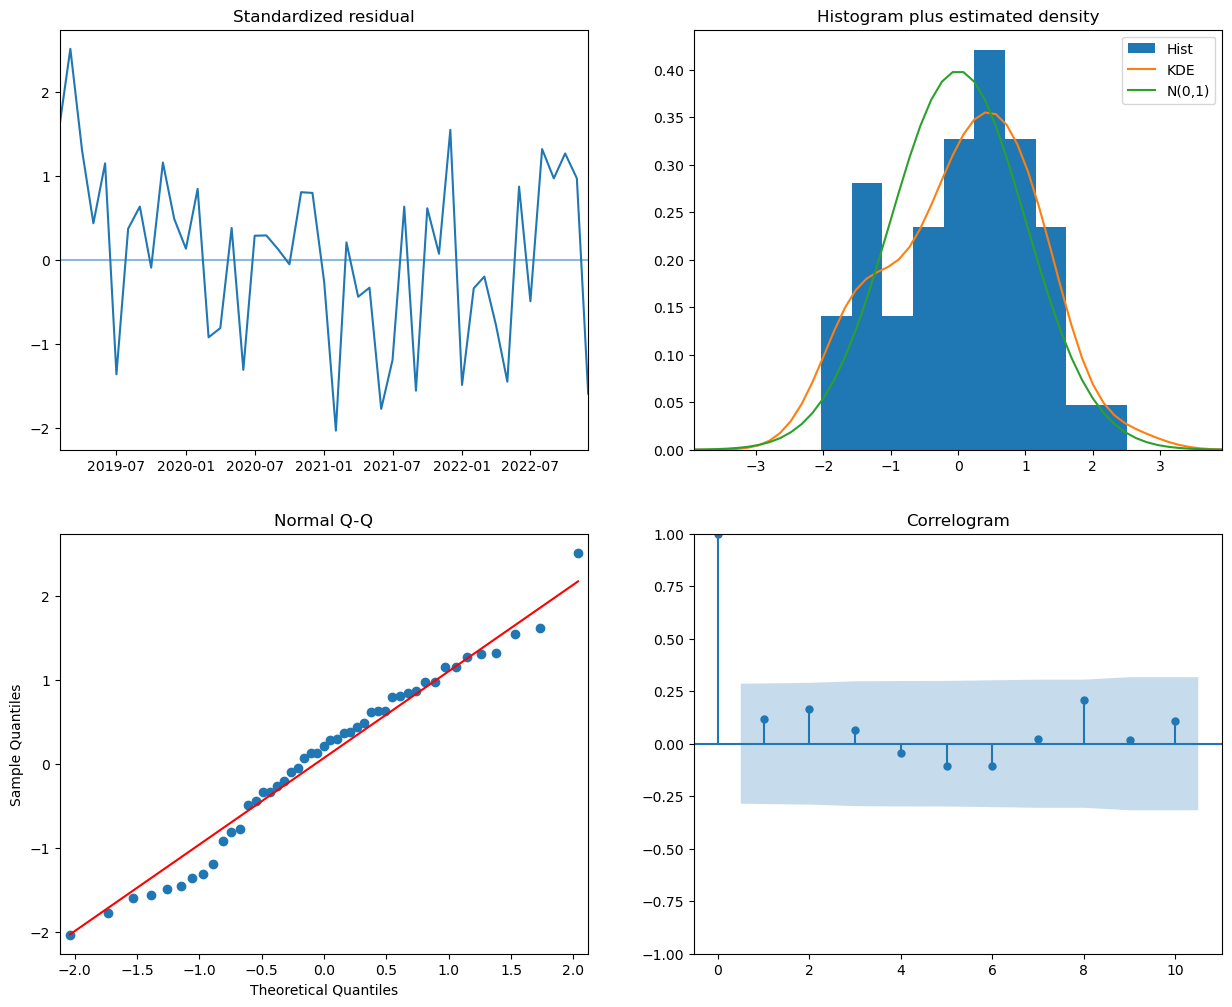

In [54]:
auto_arima.plot_diagnostics(figsize=(15, 12))
plt.show()

In [55]:
forecast_test_auto= auto_arima.predict(n_periods=len(test), exogenous=test[['Market Size','Marketing Expense']])
sales_b['Forecast_AUTO ARIMA']=[None]*len(train)+ list(forecast_test_auto)
#sales_b[['Sales','Forecast_AUTO ARIMA']].plot()

Text(0.5, 1.0, 'Product B')

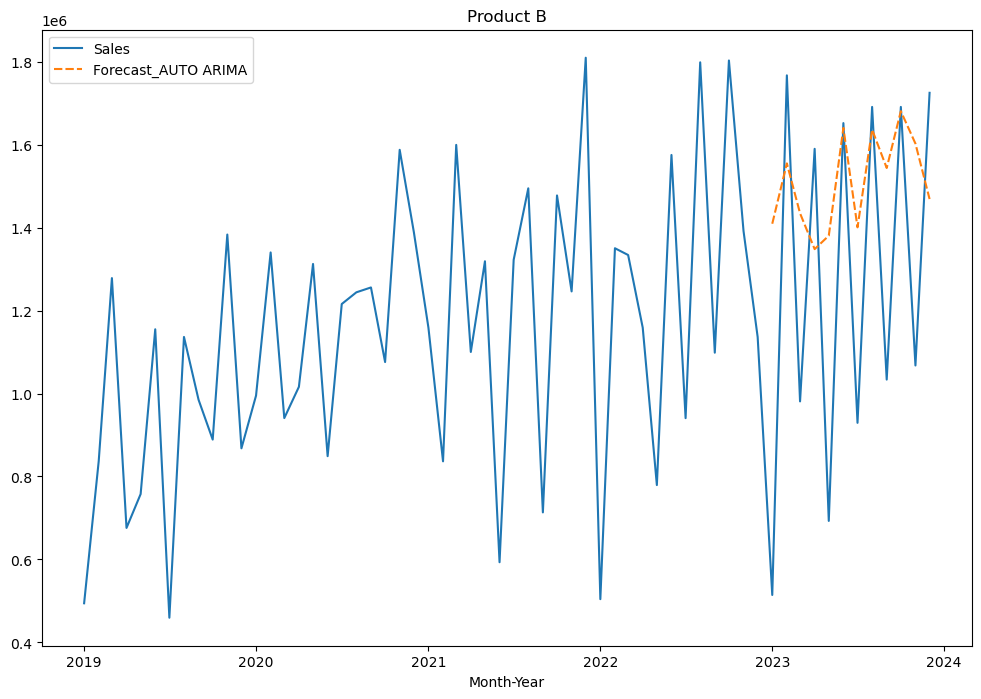

In [56]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_b[['Sales','Forecast_AUTO ARIMA']])
plt.title('Product B')

In [57]:
mae_auto_arima= mean_absolute_error(test['Sales'],forecast_test_auto)
mape_auto_arima= mean_absolute_percentage_error(test['Sales'],forecast_test_auto)
mse_auto_arima=mean_squared_error(test['Sales'],forecast_test_auto)
rmse_auto_arima= np.sqrt(mean_squared_error(test['Sales'],forecast_test_auto))

print(f'MAE - AUTO ARIMA: {mae_auto_arima}')
print(f'MAPE - AUTO ARIMA: {mape_auto_arima}')
print(f'MSE - AUTO ARIMA: {mse_auto_arima}')
print(f'RMSE - AUTO ARIMA: {rmse_auto_arima}')

MAE - AUTO ARIMA: 361595.78675793833
MAPE - AUTO ARIMA: 0.4301972486948735
MSE - AUTO ARIMA: 201684310197.0093
RMSE - AUTO ARIMA: 449092.7634654218


In [58]:
sales_b.tail(12)

,Sales,Market Size,Marketing Expense,Forecast_ARIMA,Forecast_SARIMA,Forecast_AUTO ARIMA
Month-Year,,,,,,
2023-01-01,514369,2955148,236101,1.933040e+05,1.933040e+05,1.409318e+06
2023-02-01,1767039,10151977,811092,1.349189e+06,1.349189e+06,1.554835e+06
2023-03-01,981026,5636182,450302,5.877173e+05,5.877173e+05,1.434518e+06
2023-04-01,1589911,9134343,729788,1.146329e+06,1.146329e+06,1.348098e+06
2023-05-01,692905,3980872,318051,3.556315e+05,3.556315e+05,1.380520e+06
2023-06-01,1651940,9490711,758260,1.193360e+06,1.193360e+06,1.640348e+06
2023-07-01,929333,5339196,426575,5.637172e+05,5.637172e+05,1.400658e+06
2023-08-01,1690948,9714819,776165,1.226296e+06,1.226296e+06,1.636244e+06
2023-09-01,1033615,5938316,474441,6.547241e+05,6.547241e+05,1.543738e+06


In [59]:
sales_b.mean()

Sales                  1.166948e+06
Market Size            6.014570e+06
Marketing Expense      3.312196e+05
Forecast_ARIMA         8.697041e+05
Forecast_SARIMA        8.697041e+05
Forecast_AUTO ARIMA    1.508351e+06
dtype: float64

In [60]:
sales_b.tail(12)

,Sales,Market Size,Marketing Expense,Forecast_ARIMA,Forecast_SARIMA,Forecast_AUTO ARIMA
Month-Year,,,,,,
2023-01-01,514369,2955148,236101,1.933040e+05,1.933040e+05,1.409318e+06
2023-02-01,1767039,10151977,811092,1.349189e+06,1.349189e+06,1.554835e+06
2023-03-01,981026,5636182,450302,5.877173e+05,5.877173e+05,1.434518e+06
2023-04-01,1589911,9134343,729788,1.146329e+06,1.146329e+06,1.348098e+06
2023-05-01,692905,3980872,318051,3.556315e+05,3.556315e+05,1.380520e+06
2023-06-01,1651940,9490711,758260,1.193360e+06,1.193360e+06,1.640348e+06
2023-07-01,929333,5339196,426575,5.637172e+05,5.637172e+05,1.400658e+06
2023-08-01,1690948,9714819,776165,1.226296e+06,1.226296e+06,1.636244e+06
2023-09-01,1033615,5938316,474441,6.547241e+05,6.547241e+05,1.543738e+06


In [61]:
data = {
    'model': ['ARIMAX', 'AUTO ARIMAX', 'SEASONAL ARIMAX'],
    'MAE': [mae_arima, mae_auto_arima, mae_sarima],  
    'MAPE': [mape_arima, mape_auto_arima, mape_sarima],  
    'MSE': [mse_arima, mse_auto_arima, mse_sarima],  
    'RMSE': [rmse_arima, rmse_auto_arima, rmse_sarima]  
}

model_results = pd.DataFrame(data)
model_results.set_index('model', inplace=True)
model_results

,MAE,MAPE,MSE,RMSE
model,,,,
ARIMAX,408178.969466,0.353802,1.691215e+11,411243.894583
AUTO ARIMAX,361595.786758,0.430197,2.016843e+11,449092.763465
SEASONAL ARIMAX,408178.969466,0.353802,1.691215e+11,411243.894583


# TESTING

In [43]:
auto_arima_1= pm.auto_arima(train['Sales'], start_p=0, start_q=0, max_p=5,max_q=3,
                          start_P=0, start_Q=0, max_P=2 ,max_Q=2 ,  
                          stepwise=False, trace=True,
                          seasonal=True,m=12, exogenous=train[['Market Size','Marketing Expense']])
auto_arima_1

 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1374.393, Time=0.03 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=1376.384, Time=0.05 sec
 ARIMA(0,1,0)(0,0,2)[12] intercept   : AIC=1377.119, Time=0.16 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=1376.387, Time=0.06 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1378.263, Time=0.10 sec
 ARIMA(0,1,0)(1,0,2)[12] intercept   : AIC=1378.671, Time=0.23 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=1377.144, Time=0.09 sec
 ARIMA(0,1,0)(2,0,1)[12] intercept   : AIC=1378.530, Time=0.22 sec
 ARIMA(0,1,0)(2,0,2)[12] intercept   : AIC=1380.459, Time=0.51 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1350.206, Time=0.04 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1350.297, Time=0.10 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=1351.489, Time=0.18 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1352.086, Time=0.10 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=inf, Time=0.95 sec
 ARIM

ARIMA(order=(3, 1, 1), scoring_args={}, seasonal_order=(0, 0, 1, 12),
      suppress_warnings=True)

In [44]:
auto_arima_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   48
Model:             SARIMAX(3, 1, 1)x(0, 0, 1, 12)   Log Likelihood                -660.560
Date:                            Wed, 08 May 2024   AIC                           1335.120
Time:                                    18:26:04   BIC                           1348.071
Sample:                                01-01-2019   HQIC                          1339.994
                                     - 12-01-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   4.218e+04   2.76e+04      1.529      0.126   -1.19e+04    9.63e+04
ar.L1         -0.7728      0.212     -3.647      0.000      -1.188      -0.358
ar.L2         -0.4947      0.256     -1.934      0.053      -0.996       0.007
ar.L3         -0.3294      0.161     -2.051      0.040      -0.644      -0.015
ma.L1         -0.6157      0.175     -3.516      0.000      -0.959      -0.272
ma.S.L12       0.3138      0.234      1.340      0.180      -0.145       0.773
sigma2       8.38e+10      0.007   1.17e+13      0.000    8.38e+10    8.38e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.70   Jarque-Bera (JB):                 0.90
Prob(Q):                              0.40   Prob(JB):                         0.64
Heteroskedasticity (H):               1.03   Skew:                            -0.17
Prob(H) (two-sided):                  0.96   Kurtosis:                         2.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.21e+29. Standard errors may be unstable.
"""

In [49]:
forecast_test_auto_1= auto_arima_1.predict(n_periods=len(test), exogenous=test[['Market Size','Marketing Expense']])
sales_b['Forecast_AUTO ARIMA_1']=[None]*len(train)+ list(forecast_test_auto_1)

Text(0.5, 1.0, 'Product B')

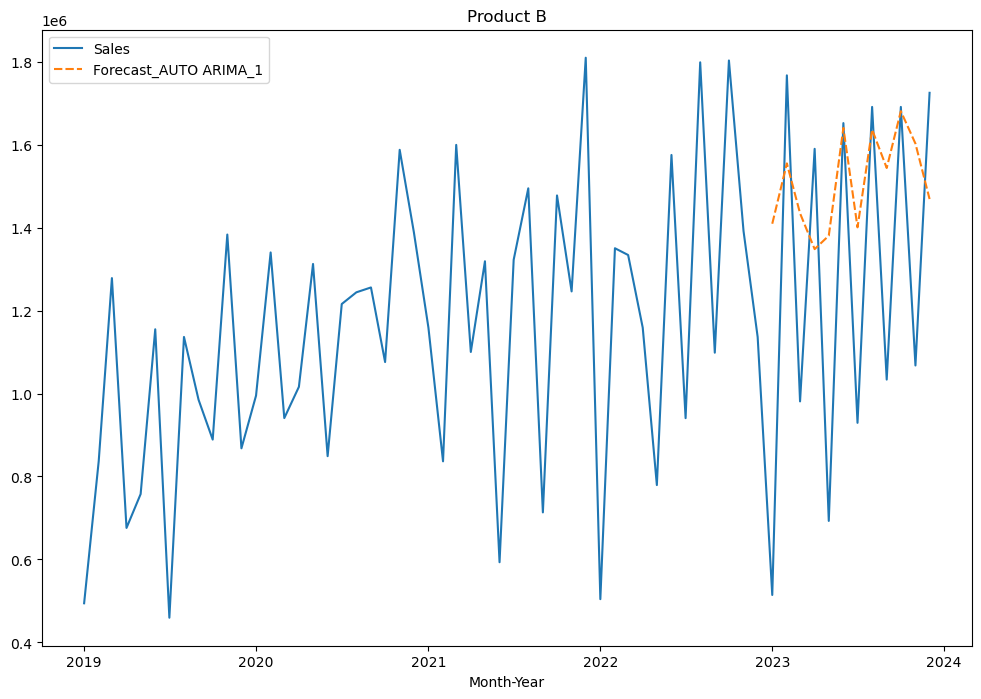

In [50]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_b[['Sales','Forecast_AUTO ARIMA_1']])
plt.title('Product B')

In [51]:
mae_auto_arima_1= mean_absolute_error(test['Sales'],forecast_test_auto_1)
mape_auto_arima_1= mean_absolute_percentage_error(test['Sales'],forecast_test_auto_1)
mse_auto_arima_1=mean_squared_error(test['Sales'],forecast_test_auto_1)
rmse_auto_arima_1= np.sqrt(mean_squared_error(test['Sales'],forecast_test_auto_1))

print(f'MAE - AUTO ARIMA: {mae_auto_arima_1}')
print(f'MAPE - AUTO ARIMA: {mape_auto_arima_1}')
print(f'MSE - AUTO ARIMA: {mse_auto_arima_1}')
print(f'RMSE - AUTO ARIMA: {rmse_auto_arima_1}')

MAE - AUTO ARIMA: 361595.78675793833
MAPE - AUTO ARIMA: 0.4301972486948735
MSE - AUTO ARIMA: 201684310197.0093
RMSE - AUTO ARIMA: 449092.7634654218
